In [109]:
import simulate as sim
import helpers
import localizer
import warnings
warnings.filterwarnings('ignore')

In [110]:
# Don't worry too much about this code for now...
from __future__ import division, print_function
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


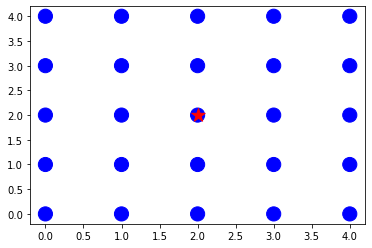

In [111]:
# This code defines a 5x5 robot world as well as some other parameters
# which we will discuss later. It then creates a simulation and shows 
# the initial beliefs. 
R = 'r'
G = 'g'
grid = [
    [R,G,G,G,R],
    [G,G,R,G,R],
    [G,R,G,G,G],
    [R,R,G,R,G],
    [R,G,R,G,R],
]

blur = 0.05
p_hit = 200.0
simulation = sim.Simulation(grid, blur, p_hit)
simulation.show_beliefs()

Run the code below multiple times by repeatedly pressing Ctrl + Enter.

After each run observe how the state has changed.

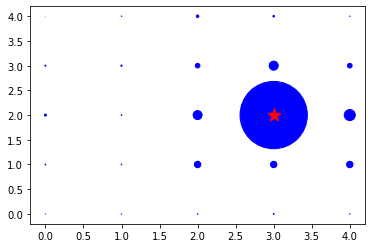

In [116]:
simulation.run(5)
simulation.show_beliefs()

In [117]:
# We will provide you with the function below to help you look
# at the raw numbers.

def show_rounded_beliefs(beliefs):
    for row in beliefs:
        for belief in row:
            print("{:0.3f}".format(belief), end="  ")
        print()
        
# The {:0.3f} notation is an example of "string 
# formatting" in Python. You can learn more about string 
# formatting at https://pyformat.info/

In [118]:
show_rounded_beliefs(simulation.beliefs)

0.000  0.000  0.001  0.000  0.000  
0.000  0.000  0.004  0.016  0.004  
0.001  0.000  0.016  0.906  0.024  
0.000  0.000  0.008  0.008  0.008  
0.000  0.000  0.000  0.000  0.000  


In [119]:
import localizer

def test_sense():
    R = 'r'
    _ = 'g'

    simple_grid = [
        [_,_,_],
        [_,R,_],
        [_,_,_]
    ]

    p = 1.0 / 9
    initial_beliefs = [
        [p,p,p],
        [p,p,p],
        [p,p,p]
    ]

    observation = R

    expected_beliefs_after = [
        [1/11, 1/11, 1/11],
        [1/11, 3/11, 1/11],
        [1/11, 1/11, 1/11]
    ]

    p_hit  = 3.0
    p_miss = 1.0
    beliefs_after_sensing = localizer.sense(
        observation, simple_grid, initial_beliefs, p_hit, p_miss)

    if helpers.close_enough(beliefs_after_sensing, expected_beliefs_after):
        print("Tests pass! Your sense function is working as expected")
        return
    
    elif not isinstance(beliefs_after_sensing, list):
        print("Your sense function doesn't return a list!")
        return
        
    elif len(beliefs_after_sensing) != len(expected_beliefs_after):
        print("Dimensionality error! Incorrect height")
        return
              
    elif len(beliefs_after_sensing[0] ) != len(expected_beliefs_after[0]):
        print("Dimensionality Error! Incorrect width")
        return
    
    elif beliefs_after_sensing == initial_beliefs:
        print("Your code returns the initial beliefs.")
        return
        
    total_probability = 0.0
    for row in beliefs_after_sensing:
        for p in row:
            total_probability += p
    if abs(total_probability-1.0) > 0.001:
        
        print("Your beliefs appear to not be normalized")
        return
    
    print("Something isn't quite right with your sense function")

test_sense()

Tests pass! Your sense function is working as expected


In [120]:
from simulate import Simulation
import simulate as sim
import helpers
# reload(localizer)
# reload(sim)
# reload(helpers)

R = 'r'
G = 'g'
grid = [
    [R,G,G,G,R,R,R],
    [G,G,R,G,R,G,R],
    [G,R,G,G,G,G,R],
    [R,R,G,R,G,G,G],
    [R,G,R,G,R,R,R],
    [G,R,R,R,G,R,G],
    [R,R,R,G,R,G,G],
]

# Use small value for blur. This parameter is used to represent
# the uncertainty in MOTION, not in sensing. We want this test
# to focus on sensing functionality
blur = 0.1
p_hit = 100.0
simulation = sim.Simulation(grid, blur, p_hit)

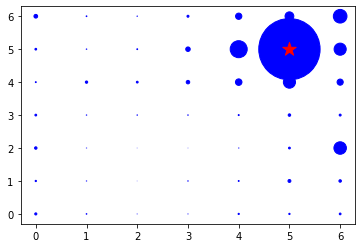

In [123]:
# Use control+Enter to run this cell many times and observe how 
# the robot's belief that it is in each cell (represented by the
# size of the corresponding circle) changes as the robot moves.
# The true position of the robot is given by the red star.

# Run this cell about 15-25 times and observe the results
simulation.run(5)
simulation.show_beliefs()

# If everything is working correctly you should see the beliefs
# converge to a single large circle at the same position as the 
# red star. Though, if your sense function is implemented correctly
# and this output is not converging as expected.. it may have to do
# with the `move` function bug; your next task!
#
# When you are satisfied that everything is working, continue
# to the next section

In [100]:
from simulate import Simulation
import simulate as sim
import helpers
# reload(localizer)
# reload(sim)
# reload(helpers)

R = 'r'
G = 'g'

grid = [ 
    [R,G,G,G,R,R,R],
    [G,G,R,G,R,G,R],
    [G,R,G,G,G,G,R],
    [R,R,G,R,G,G,G],
]

blur = 0.001
p_hit = 100.0
simulation = sim.Simulation(grid, blur, p_hit)

# remember, the user said that the robot would sometimes drive around for a bit...
# It may take several calls to "simulation.run" to actually trigger the bug.
simulation.run(5)
simulation.show_beliefs()

IndexError: list index out of range

In [103]:
# According to the user, sometimes the robot actually does run "for a while" 
# - How can you change the code so the robot runs "for a while"?
# - How many times do you need to call simulation.run() to consistently
#   reproduce the bug?
# Modify the code below so that when the function is called 
# it consistently reproduces the bug.
def test_robot_works_in_rectangle_world():
    from simulate import Simulation
    import simulate as sim
    import helpers
#     reload(localizer)
#     reload(sim)
#     reload(helpers)

    R = 'r'
    G = 'g'

    grid = [ 
        [R,G,G,G,R,R,R],
        [G,G,R,G,R,G,R],
        [G,R,G,G,G,G,R],
        [R,R,G,R,G,G,G],
    ]

    blur = 0.001
    p_hit = 100.0
    for i in range(1000):
        simulation = sim.Simulation(grid, blur, p_hit)
        simulation.run(1)
    
test_robot_works_in_rectangle_world()

In [104]:
# According to the user, sometimes the robot actually does run "for a while" 
# - How can you change the code so the robot runs "for a while"?
# - How many times do you need to call simulation.run() to consistently
#   reproduce the bug?
# Modify the code below so that when the function is called 
# it consistently reproduces the bug.
def test_robot_works_in_rectangle_world():
    from simulate import Simulation
    import simulate as sim
    import helpers
    # reload(localizer)
    # reload(sim)
    # reload(helpers)

    R = 'r'
    G = 'g'

    grid = [ 
        [R,G,G,G,R,R,R],
        [G,G,R,G,R,G,R],
        [G,R,G,G,G,G,R],
        [R,R,G,R,G,G,G],
    ]

    blur = 0.001
    p_hit = 100.0
    for i in range(1000):
        simulation = sim.Simulation(grid, blur, p_hit)
        simulation.run(1)
    
test_robot_works_in_rectangle_world()

In [108]:
test_robot_works_in_rectangle_world()